# Buddy Bass Fishing Tournament

Dataset:
The dataset I'll use is an excel spreadsheet with data collected from the weekly fishing tournament.

## Importing the Data

This is where I import any needed Python libraries and all datasets I'll use in the notebook.

In [82]:
# Import libraries
from matplotlib import pyplot as plt
from datetime import datetime
import pandas as pd
import numpy as np

# Column of dates to parse
date_col = ["Date"]

# Read the Excel file for the year 2020
buddy_bass_tournament20 = pd.read_excel("data/Buddy Bass Tournament 2020.xlsx", skiprows = 2, parse_dates = date_col)

## Exploring the Data

In [83]:
# View the first five rows of data
buddy_bass_tournament20.head()

,Date,Number of Boats,Total No of Fish Caught,Total Weight in Pounds,Big Fish (LBS),Avg Water Temp,Big Fish/Year (LBS)
0,2020-06-03,25.0,28.0,46.20,4.56,NaN,NaN
1,2020-06-10,28.0,71.0,105.98,4.80,NaN,NaN
2,2020-06-24,29.0,49.0,77.00,4.32,75.2,Wieda/Young 5.48 *
3,2020-07-01,33.0,61.0,83.86,5.26,76.8,""""
4,2020-07-08,26.0,50.0,74.30,4.50,76.8,""""


In [84]:
# Drop the "Big Fish/Year (LBS)" column and set the df to buddy_bass_2020 variable
buddy_bass_2020 = buddy_bass_tournament20.drop(columns=['Big Fish/Year (LBS)'])

# View first five rows of data to confirm that column is gone
buddy_bass_2020.head()

,Date,Number of Boats,Total No of Fish Caught,Total Weight in Pounds,Big Fish (LBS),Avg Water Temp
0,2020-06-03,25.0,28.0,46.20,4.56,NaN
1,2020-06-10,28.0,71.0,105.98,4.80,NaN
2,2020-06-24,29.0,49.0,77.00,4.32,75.2
3,2020-07-01,33.0,61.0,83.86,5.26,76.8
4,2020-07-08,26.0,50.0,74.30,4.50,76.8


.info() shows information about the columns including data type and number of missing values

In [85]:
# Display information about the columns
buddy_bass_2020.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 13 entries, 0 to 12
Data columns (total 6 columns):
 #   Column                   Non-Null Count  Dtype         
---  ------                   --------------  -----         
 0   Date                     13 non-null     datetime64[ns]
 1   Number of Boats          13 non-null     float64       
 2   Total No of Fish Caught  13 non-null     float64       
 3   Total Weight in Pounds   13 non-null     float64       
 4   Big Fish (LBS)           13 non-null     float64       
 5   Avg Water Temp           11 non-null     float64       
dtypes: datetime64[ns](1), float64(5)
memory usage: 752.0 bytes


In [86]:
# Return the number of rows and columns in the data
buddy_bass_2020.shape

(13, 6)

.describe() calculates summary statistics for each column

In [87]:
# Display a summary of statistics calculated for each column
buddy_bass_2020.describe()

,Number of Boats,Total No of Fish Caught,Total Weight in Pounds,Big Fish (LBS),Avg Water Temp
count,13.000000,13.000000,13.000000,13.000000,11.000000
mean,29.692308,53.538462,75.713846,4.290769,80.518182
std,3.198557,16.276852,24.735615,0.939241,3.602171
min,25.000000,28.000000,41.400000,2.340000,75.200000
25%,28.000000,48.000000,58.490000,4.260000,77.650000
50%,29.000000,54.000000,75.420000,4.460000,80.400000
75%,31.000000,61.000000,83.860000,4.800000,83.300000
max,37.000000,84.000000,125.420000,5.440000,85.300000


.columns creates an index of the column names

In [88]:
# Creates an index of the column names
buddy_bass_2020.columns

Index(['Date', 'Number of Boats', 'Total No of Fish Caught',
       'Total Weight in Pounds', 'Big Fish (LBS)', 'Avg Water Temp'],
      dtype='object')

In [95]:
# Create a new column called "Average Fish Weight" 
buddy_bass_2020["Average Fish Weight"] = buddy_bass_2020["Total Weight in Pounds"] / buddy_bass_2020["Total No of Fish Caught"]

print(buddy_bass_2020.head())

        Date  Number of Boats  Total No of Fish Caught  \
0 2020-06-03             25.0                     28.0   
1 2020-06-10             28.0                     71.0   
2 2020-06-24             29.0                     49.0   
3 2020-07-01             33.0                     61.0   
4 2020-07-08             26.0                     50.0   

   Total Weight in Pounds  Big Fish (LBS)  Avg Water Temp  Average Fish Weight  
0                   46.20            4.56             NaN             1.650000  
1                  105.98            4.80             NaN             1.492676  
2                   77.00            4.32            75.2             1.571429  
3                   83.86            5.26            76.8             1.374754  
4                   74.30            4.50            76.8             1.486000  


In [91]:
buddy_bass_2020[["Number of Boats", "Total No of Fish Caught"]]

,Number of Boats,Total No of Fish Caught
0,25.0,28.0
1,28.0,71.0
2,29.0,49.0
3,33.0,61.0
4,26.0,50.0
5,29.0,54.0
6,32.0,48.0
7,31.0,56.0
8,37.0,71.0
9,31.0,33.0


In [96]:
buddy_bass_2020[buddy_bass_2020["Number of Boats"] < 30]

,Date,Number of Boats,Total No of Fish Caught,Total Weight in Pounds,Big Fish (LBS),Avg Water Temp,Average Fish Weight
0,2020-06-03,25.0,28.0,46.20,4.56,NaN,1.650000
1,2020-06-10,28.0,71.0,105.98,4.80,NaN,1.492676
2,2020-06-24,29.0,49.0,77.00,4.32,75.2,1.571429
4,2020-07-08,26.0,50.0,74.30,4.50,76.8,1.486000
5,2020-07-15,29.0,54.0,68.27,4.26,78.5,1.264259
10,2020-08-19,28.0,58.0,75.42,4.46,85.3,1.300345
12,2020-09-13,27.0,84.0,125.42,4.28,78.8,1.493095


In [97]:
# Add a new column "Month" that turns the "Date" column into it's month number equivalent
buddy_bass_2020["Month"] = buddy_bass_2020["Date"]\
    .dt.month

print(buddy_bass_2020.head())


        Date  Number of Boats  Total No of Fish Caught  \
0 2020-06-03             25.0                     28.0   
1 2020-06-10             28.0                     71.0   
2 2020-06-24             29.0                     49.0   
3 2020-07-01             33.0                     61.0   
4 2020-07-08             26.0                     50.0   

   Total Weight in Pounds  Big Fish (LBS)  Avg Water Temp  \
0                   46.20            4.56             NaN   
1                  105.98            4.80             NaN   
2                   77.00            4.32            75.2   
3                   83.86            5.26            76.8   
4                   74.30            4.50            76.8   

   Average Fish Weight  Month  
0             1.650000      6  
1             1.492676      6  
2             1.571429      6  
3             1.374754      7  
4             1.486000      7  


In [99]:
buddy_bass_month = buddy_bass_2020[["Month"]]

print(buddy_bass_month)

    Month
0       6
1       6
2       6
3       7
4       7
5       7
6       7
7       7
8       8
9       8
10      8
11      8
12      9


In [ ]:
# Define an empty list
colors = []

# Iterate over rows of buddy_bass_month
for lab, row in buddy_bass_month.iterrows() :
    if row["Month"] == 6 :
        colors.append("green")
    elif row["Month"] == 7 :
        colors.append("blue")
    elif row["Month"] == 8 :
        colors.append("purple") 
    else:
        colors.append("red")

print(colors)    

['green', 'green', 'green', 'blue', 'blue', 'blue', 'blue', 'blue', 'purple', 'purple', 'purple', 'purple', 'red']


In [92]:
buddy_bass_2020["Total No of Fish Caught"].median()

54.0

In [94]:
buddy_bass_2020.groupby("Date")["Number of Boats"].mean()

Date
2020-06-03    25.0
2020-06-10    28.0
2020-06-24    29.0
2020-07-01    33.0
2020-07-08    26.0
2020-07-15    29.0
2020-07-22    32.0
2020-07-29    31.0
2020-08-05    37.0
2020-08-12    31.0
2020-08-19    28.0
2020-08-26    30.0
2020-09-13    27.0
Name: Number of Boats, dtype: float64

In [ ]:
buddy_bass_2020["Date"]\
    .head(3)\
        .dt.year

0    2020
1    2020
2    2020
Name: Date, dtype: int64

In [ ]:
buddy_bass["Date"]\
    .head()\
        .dt.day_name()

0    Wednesday
1    Wednesday
2    Wednesday
3    Wednesday
4    Wednesday
Name: Date, dtype: object

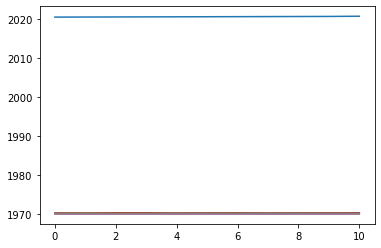

In [ ]:
plt.plot(buddy_bass_2020)
plt.show()